<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Selection of features for practice**


In [16]:
#import data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

print (data.shape)
print(data)

(1460, 81)
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea

In [2]:
X = data.loc[:,['GrLivArea', 'YearBuilt']]
print (X)
Y = data.loc[:, 'SalePrice']
print (Y)

      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


**[Problem 2] Estimation and evaluation by linear regression**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print (X_train.shape)
print (y_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train_standard= scaler.transform(X_train)
X_test_standard= scaler.transform(X_test)
print (X_train_standard)

(1095, 2)
(1095,)
[[-0.0516431   1.1078893 ]
 [-0.42169218  0.09454315]
 [-0.51847425 -1.04955734]
 ...
 [-1.26616316 -0.52653997]
 [-0.19966273 -1.73601764]
 [ 0.04513897  1.17326647]]


Linear regression

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_standard, y_train)
prediction_reg = reg.predict(X_test_standard)
print (prediction_reg)

[130445.81129484 306448.48211547  88741.8324304  168496.12883044
 227800.17562669  99569.77660678 186783.75135889 182056.44293199
  97457.76006969 151960.15487048 131192.06213304 117840.59883308
  84836.16656948 216795.82827786 226861.55984128 114354.20681418
 233851.35381306 133362.46046392  79874.70207186 210577.06633379
 191870.90367478 226090.42299764 212412.50678112 110884.40546558
 201927.81582345 174203.21527073 201986.40724909  98966.53796861
 215765.02046252 202036.70333958  89328.69003012 262849.94729844
 298537.18710817 112359.4779443  228219.23983687 138826.88586649
 193790.24081689 251971.28776788 295988.88679508 105906.0358499
 109778.31073838 259246.16279641 128015.21791264 267761.22052149
 120958.43236415 148080.42317423 117119.86289586 123196.13671951
 291177.99612118 167205.33559564 109342.34141015 191233.74998457
 165931.23784706 312885.33353957 153459.9037228  236198.05050049
 227305.82450466 150577.06478984 148691.32825201  99779.46593575
  41908.28123103 142631.95

In [6]:
from sklearn.metrics import mean_squared_error

mse_reg = mean_squared_error(y_test, prediction_reg)
print (mse_reg)

2314465092.7320137


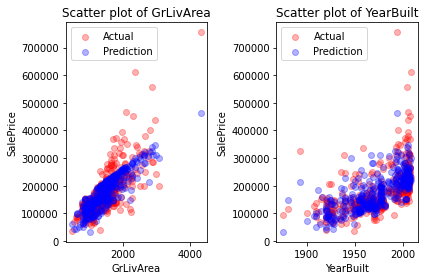

In [8]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X_test.iloc[:,0], y_test, color='red', alpha=0.3, label= 'Actual')
ax1.scatter(X_test.iloc[:,0], prediction_reg, color='blue', alpha=0.3, label = 'Prediction')
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.set_title('Scatter plot of GrLivArea')
ax1.legend()

ax2.scatter(X_test.iloc[:,1], y_test, color='red', alpha=0.3, label= 'Actual')
ax2.scatter(X_test.iloc[:,1], prediction_reg, color='blue', alpha=0.3, label = 'Prediction')
ax2.set_xlabel('YearBuilt')
ax2.set_ylabel('SalePrice')
ax2.set_title('Scatter plot of YearBuilt')
ax2.legend()
plt.tight_layout()
plt.show()


Comparison of methods

In [9]:
#following models are not tuned
#SVM regression
from sklearn.svm import SVR
regression_SVR = SVR(C=1.0, epsilon=0.2).fit(X_train_standard, y_train)
#prediction
prediction_SVR = regression_SVR.predict(X_test_standard)

#DecisionTree regression
from sklearn.tree import DecisionTreeRegressor
regression_DS = DecisionTreeRegressor(random_state=0).fit(X_train_standard, y_train)

#prediction
prediction_DS = regression_DS.predict(X_test_standard)

#Random forest regression

from sklearn.ensemble import RandomForestRegressor

regression_RF = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train_standard, y_train)
#prediction
prediction_RF = regression_RF.predict(X_test_standard)

mse_reg_SVR = mean_squared_error(y_test, prediction_SVR)
mse_reg_DS = mean_squared_error(y_test, prediction_DS)
mse_reg_RF = mean_squared_error(y_test, prediction_RF)

d = {'MSE':[mse_reg, mse_reg_SVR, mse_reg_DS, mse_reg_RF]}
evaluation_table = pd.DataFrame(data=d, index=['LR', 'SVR', 'DS', 'RF'])
print(evaluation_table)

              MSE
LR   2.314465e+09
SVR  7.169220e+09
DS   2.276521e+09
RF   2.805721e+09


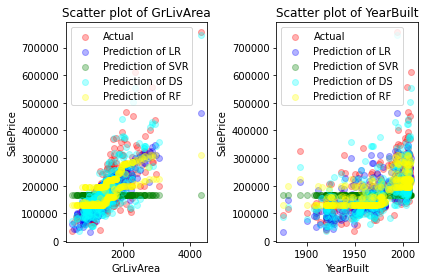

In [10]:
#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X_test.iloc[:,0], y_test, color='red', alpha=0.3, label= 'Actual')
ax1.scatter(X_test.iloc[:,0], prediction_reg, color='blue', alpha=0.3, label = 'Prediction of LR')
ax1.scatter(X_test.iloc[:,0], prediction_SVR, color='green', alpha=0.3, label = 'Prediction of SVR')
ax1.scatter(X_test.iloc[:,0], prediction_DS, color='cyan', alpha=0.3, label = 'Prediction of DS')
ax1.scatter(X_test.iloc[:,0], prediction_RF, color='yellow', alpha=0.3, label = 'Prediction of RF')

ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.set_title('Scatter plot of GrLivArea')
ax1.legend()

ax2.scatter(X_test.iloc[:,1], y_test, color='red', alpha=0.3, label= 'Actual')
ax2.scatter(X_test.iloc[:,1], prediction_reg, color='blue', alpha=0.3, label = 'Prediction of LR')
ax2.scatter(X_test.iloc[:,1], prediction_SVR, color='green', alpha=0.3, label = 'Prediction of SVR')
ax2.scatter(X_test.iloc[:,1], prediction_DS, color='cyan', alpha=0.3, label = 'Prediction of DS')
ax2.scatter(X_test.iloc[:,1], prediction_RF, color='yellow', alpha=0.3, label = 'Prediction of RF')
ax2.set_xlabel('YearBuilt')
ax2.set_ylabel('SalePrice')
ax2.set_title('Scatter plot of YearBuilt')
ax2.legend()
plt.tight_layout()
plt.show()

In [11]:
X = data.loc[:, data.columns != 'SalePrice']
print (X)
Y = data.loc[:, 'SalePrice']
print (Y)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

print(X.dtypes)

le.fit(X['SaleCondition'])
X['SaleCondition'] = le.transform(X['SaleCondition'])

print(X.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition      int64
Length: 80, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
X = X.select_dtypes(exclude=object)

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(X)
X = imp.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print (X_train.shape)
print (y_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train_standard= scaler.transform(X_train)
X_test_standard= scaler.transform(X_test)
print (X_train_standard)

(1095, 38)
(1095,)
[[ 0.69831455  1.47591094 -1.19939241 ... -0.5081387   0.13714344
   0.19920235]
 [ 0.19637178 -0.87122795  0.336518   ... -2.00086003 -1.37212357
   0.19920235]
 [ 1.54902506 -0.16708628 -0.45337878 ...  1.35776296  0.89177695
   0.19920235]
 ...
 [ 1.33693656 -0.87122795 -0.45337878 ... -0.88131903 -1.37212357
   0.19920235]
 [ 0.31419872 -0.16708628 -0.67279455 ... -0.13495837 -0.61749006
   0.19920235]
 [ 0.94103804  1.47591094 -0.76056086 ... -0.13495837  0.89177695
   0.19920235]]


In [15]:
#following models are not tuned
#SVM regression
from sklearn.svm import SVR
regression_SVR = SVR(C=1.0, epsilon=0.2).fit(X_train_standard, y_train)
#prediction
prediction_SVR = regression_SVR.predict(X_test_standard)

#DecisionTree regression
from sklearn.tree import DecisionTreeRegressor
regression_DS = DecisionTreeRegressor(random_state=0).fit(X_train_standard, y_train)

#prediction
prediction_DS = regression_DS.predict(X_test_standard)

#Random forest regression

from sklearn.ensemble import RandomForestRegressor

regression_RF = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train_standard, y_train)
#prediction
prediction_RF = regression_RF.predict(X_test_standard)

mse_reg_SVR = mean_squared_error(y_test, prediction_SVR)
mse_reg_DS = mean_squared_error(y_test, prediction_DS)
mse_reg_RF = mean_squared_error(y_test, prediction_RF)

d = {'MSE':[mse_reg, mse_reg_SVR, mse_reg_DS, mse_reg_RF]}
evaluation_table = pd.DataFrame(data=d, index=['LR', 'SVR', 'DS', 'RF'])
print(evaluation_table)

              MSE
LR   2.314465e+09
SVR  7.182569e+09
DS   1.232433e+09
RF   1.999290e+09
